# Machine Learning Model Generation - Binary Classification

### 1. [Tutorial links](#tutorials)
### 2. [Load CSV File](#csv_file)
### 3. [Split the dataset. _Technique: Train-Test split_](#train_test)
### 4. [Generate Binary Classification Models using Train-Test split](#binomial_train_test)

> #### 4.1. [Logistic Regression Model using Train-Test split](#lr_train_test)
#### 4.2. [Random Forest Model using Train-Test split](#rf_train_test)
#### 4.3. [k-Nearest Neighbor Model using Train-Test split](#knn_train_test)
#### 4.4. [Support Vector Machine (SVM) Model using Train-Test split](#svm_train_test)
#### 4.5. [XGBoost Classifier Model using Train-Test split](#xgb_train_test)

### 5. [Analyze the model results](#analyze_results)

> #### 5.1. [Print Accuracy and AUC of all models](#print_AUC)

### 6. [Split the dataset. _Technique: K-Fold Cross Validation_](#k_fold)
### 7. [Generate Binary Classification Models using K-Fold split](#binomial_kfold)
> #### 7.1. [Logistic Regression Model using K-Fold split](#lr_kfold)
#### 7.2. [Random Forest Model using K-Fold split](#rf_kfold)
#### 7.3. [k-Nearest Neighbor Model using K-Fold split](#knn_kfold)
#### 7.4. [Support Vector Machine (SVM) Model using K-Fold split](#svm_kfold)
#### 7.5. [XGBoost Classifier Model using K-Fold split](#xgb_kfold)


## <a id='tutorials'>1. Tutorial links</a>

### Load libraries

In [53]:
# Import pandas library
import pandas as pd

# Import numpy library
import numpy as np

# Import Train-Test split library
from sklearn.linear_model import LogisticRegression

# Import RandomForestClassifier library
from sklearn.ensemble import RandomForestClassifier

# Import KNeighborsClassifier library
from sklearn.neighbors import KNeighborsClassifier

# Import Support Vector Machine (SVM) library
from sklearn import svm

# Import XGBClassifier library
from xgboost import XGBClassifier

# Import Train-Test split library
from sklearn.model_selection import train_test_split

# Import KFold split library
from sklearn.model_selection import KFold

# Import XGBClassifier library
from xgboost import XGBClassifier

# Import accuracy score computing library
from sklearn.metrics import accuracy_score

# Import metrics library
from sklearn import metrics

# Import matplotlib library
import matplotlib.pyplot as plt
%matplotlib inline

# Import warnings
import warnings
warnings.filterwarnings('ignore')

### <a id='csv_file'>2. Load CSV file saved locally after Feature Engineering<a>

In [54]:
# Load Loan Data file that is saved after Feature Engineering from local disk
loan_data = pd.read_csv("LoanData_final.csv")

# Print the shape
print (loan_data.shape)

# Print few rows to visualize the data
loan_data.head()

(601, 10)


,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome_log,income_per_person_log,Gender_label,Married_label,Education_label,Self_Employed_label,Loan_Status
0,120.0,360.0,1.0,8.674026,8.674026,1,0,0,0,1
1,128.0,360.0,1.0,8.714568,8.021420,1,1,0,0,0
2,66.0,360.0,1.0,8.006368,8.006368,1,1,0,1,1
3,120.0,360.0,1.0,8.505323,8.505323,1,1,1,0,1
4,141.0,360.0,1.0,8.699515,8.699515,1,0,0,0,1


## <a id='train_test'>3. Split the dataset. _Technique: Train-Test split_</a>

In [20]:
# Set the Train and Test split ratio to 80:20
SPLIT_RATIO = 0.2

# Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(loan_data.drop('Loan_Status',  axis = 1), 
                                                    loan_data['Loan_Status'], 
                                                    test_size=SPLIT_RATIO, 
                                                    random_state = 21345)

# Print the shape of the Train set
print("Train dataset: ", X_train.shape, Y_train.shape)

# Print the shape of the Test set
print("Test dataset: ", X_test.shape, Y_test.shape)

Train dataset:  (480, 9) (480,)
Test dataset:  (121, 9) (121,)


## <a id='binomial_train_test'>4. Generate Binary Classification Models using Train-Test split</a>

### <a id='lr_train_test'>4.1 Logistic Regression Model using Train-Test split</a>

In [21]:
# Generate a Logistic Regression object
# liblinear removes warning due to backward compatibility. NOT Important
lr_model = LogisticRegression(solver='liblinear', random_state=2011)

# Train a Logistic Regression model with Train dataset
lr_model.fit(X_train, Y_train)

# Predict the outcome
y_hat_lr = lr_model.predict(X_test)

# Compute the accuracy score and print it
accuracy_lr = accuracy_score(Y_test, y_hat_lr)

# Print first 8 rows to visualize the prediction.
print ("First few predicted Loan Status values:", y_hat_lr[:8], "\n")

# Compute accuracy score
print ("Accuracy of Logistic Regression model:", accuracy_lr)

# Print confusion matrix of actual and predicted values using Crosstab function
pd.crosstab(Y_test, y_hat_lr, rownames=['Actual'], colnames=['Predicted'], margins=True)

First few predicted Loan Status values: [1 1 1 1 1 1 0 1] 

Accuracy of Logistic Regression model: 0.7933884297520661


Predicted,0,1,All
Actual,,,
0,18,23,41
1,2,78,80
All,20,101,121


#### 4.1.1 Print Logistic Regression Model parameters

In [22]:
# Print the Linear Regression Model
lr_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=2011, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

#### 4.1.2 To output the Binary Probability using Logistic Regression model ...

As we discussed in one of the classes earlier, the Classifier models accept the Train dataset and generate the model that is capable of predicting **"the probability of the outcome"**. <br>

In the above example, we used **`lr_model.predict(X_test)`** to predict the binary outcome. However, if you want a binary probability outcome, do the following -

In [23]:
# Predict the binary probability outcome
y_hat_lr_proba = lr_model.predict_proba(X_test)

# Print first 8 rows to visualize the prediction.
y_hat_lr_proba[:8]

array([[0.25256429, 0.74743571],
       [0.23298107, 0.76701893],
       [0.16059218, 0.83940782],
       [0.16794134, 0.83205866],
       [0.15135649, 0.84864351],
       [0.10591146, 0.89408854],
       [0.81921599, 0.18078401],
       [0.1856494 , 0.8143506 ]])

#### 4.1.3 To draw Area Under the Curve (AUC) of Logistic Regression model ...

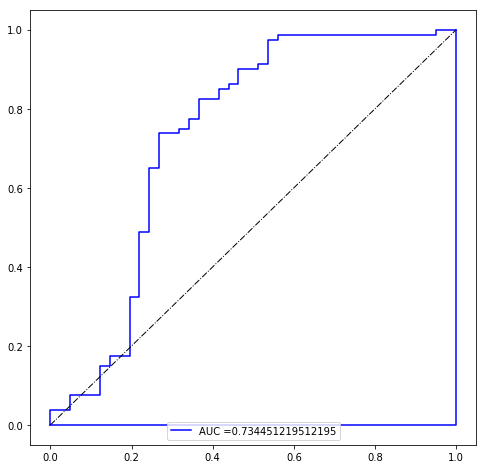

In [24]:
# Compute area under the curve (AUC)
auc_lr = metrics.roc_auc_score(Y_test, y_hat_lr_proba[:, 1])

# Compute False Positive Rate, True Positive Rate, and Thresholds using metrics library
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_hat_lr_proba[:, 1])

# Set the plotting area/ size
plt.figure(figsize = (8, 8))

# Plot the AUC curve
plt.plot(fpr, tpr, label='AUC =' + str(auc_lr), color='b')
plt.legend(loc=8)

# Plot the base line (diagonal dotted line)
plt.plot([0, 1], [0, 1], 'k-.', lw=1)

x = [0, 1, 1]
y = [0, 0, 1]
# Plot the base line (diagonal dotted line)
plt.plot(x, y, 'k-',  color='b')

#### 4.1.4 Scatterplot the actual and predicted classifications.

Text(0.5, 1.0, "Scatter plot of 'Actual' and 'Predicted' values - Logistic Regression")

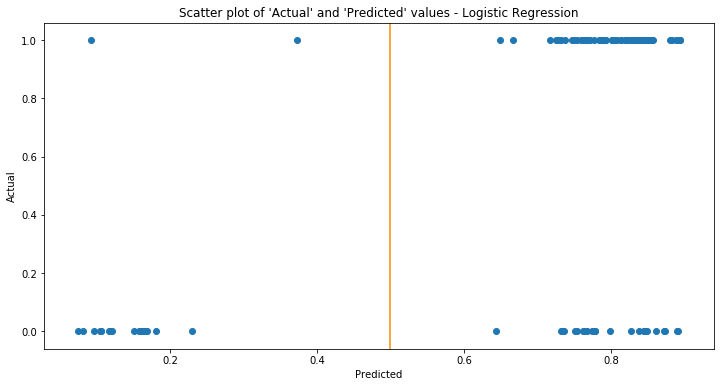

In [25]:
y_hat_lr_list=y_hat_lr_proba[:, 1:2].tolist()

# Set the plotting area/ size
plt.figure(figsize = (12, 6))

# Scatter plot the Actual and Predicted values
plt.scatter(y_hat_lr_list, Y_test)
plt.axvline(x=0.5, c='darkorange')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Scatter plot of 'Actual' and 'Predicted' values - Logistic Regression")

### <a id='rf_train_test'>4.2 Random Forest Model using Train-Test split</a>

In [26]:
# Generate a Random Forest Classifier object
rf_model = RandomForestClassifier(n_estimators=100, min_samples_leaf=1, random_state=2202)

# n_estimators - represents no of trees in the forest
# n_jobs - No of cores to be used
# max_depth - depth of each tree in the forest
# min_samples_split - Minimum number of samples required to split an internal node
# min_samples_leaf  - Minimum number of samples required to be at a leaf node
# max_features - the number of features to consider when looking for best split

# Train a Random Forest model with Train dataset
rf_model.fit(X_train, Y_train)

# Predict the outcome
y_hat_rf = rf_model.predict(X_test)

# Compute the accuracy score and print it
accuracy_rf = accuracy_score(Y_test, y_hat_rf)

# Print first 8 rows to visualize the prediction.
print ("First few predicted Loan Status values:", y_hat_rf[:8], "\n")

# Compute accuracy score
print ("Accuracy of Random Forest model:", accuracy_rf)

# Print confusion matrix of actual and predicted values using Crosstab function
pd.crosstab(Y_test, y_hat_rf, rownames=['Actual'], colnames=['Predicted'], margins=True)

First few predicted Loan Status values: [1 1 1 1 1 1 0 1] 

Accuracy of Random Forest model: 0.8181818181818182


Predicted,0,1,All
Actual,,,
0,22,19,41
1,3,77,80
All,25,96,121


#### 4.2.1 Print Random Forest Model parameters

In [27]:
# Print the Random Forest Model
rf_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=2202, verbose=0,
            warm_start=False)

#### 4.2.2 To output the Binary Probability using Random Forest model ...

In [28]:
# Predict the binary probability outcome
y_hat_rf_proba = rf_model.predict_proba(X_test)

# Print first 8 rows to visualize the prediction.
y_hat_rf_proba[:8]

array([[0.31, 0.69],
       [0.23, 0.77],
       [0.2 , 0.8 ],
       [0.07, 0.93],
       [0.34, 0.66],
       [0.31, 0.69],
       [0.93, 0.07],
       [0.07, 0.93]])

#### 4.2.3 To draw Area Under the Curve (AUC) of Random Forest model ...

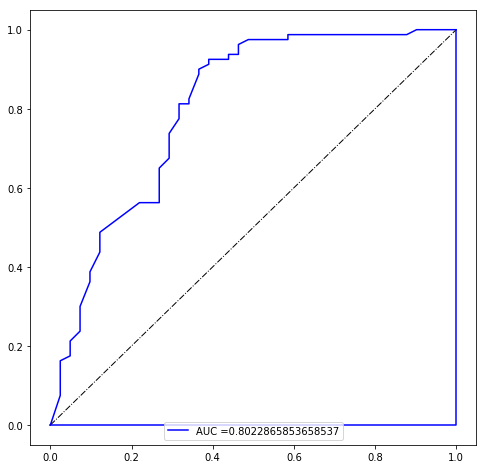

In [29]:
# Compute area under the curve (AUC)
auc_rf = metrics.roc_auc_score(Y_test, y_hat_rf_proba[:, 1])

# Compute False Positive Rate, True Positive Rate, and Thresholds using metrics library
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_hat_rf_proba[:, 1])

# Set the plotting area/ size
plt.figure(figsize = (8, 8))

# Plot the AUC curve
plt.plot(fpr, tpr, label='AUC =' + str(auc_rf), color='b')
plt.legend(loc=8)

# Plot the base line (diagonal dotted line)
plt.plot([0, 1], [0, 1], 'k-.', lw=1)

x = [0, 1, 1]
y = [0, 0, 1]
# Plot the base line (diagonal dotted line)
plt.plot(x, y, 'k-',  color='b')

### <a id='knn_train_test'>4.3 k-Nearest Neighbor Model using Train-Test split</a>

In [30]:
# Generate a k-Nearest Neighbor object
knn_model = KNeighborsClassifier(n_neighbors = 9)

# Train a k-Nearest Neighbor model with Train dataset
knn_model.fit(X_train, Y_train)

# Predict the outcome
y_hat_knn = knn_model.predict(X_test)

# Compute the accuracy score and print it
accuracy_knn = accuracy_score(Y_test, y_hat_knn)

# Print first 8 rows to visualize the prediction.
print ("First few predicted Loan Status values:", y_hat_knn[:8], "\n")

# Compute accuracy score
print ("Accuracy of k-Nearest Neighbor model:", accuracy_knn)

# Print confusion matrix of actual and predicted values using Crosstab function
pd.crosstab(Y_test, y_hat_knn, rownames=['Actual'], colnames=['Predicted'], margins=True)

First few predicted Loan Status values: [1 1 1 1 1 1 1 1] 

Accuracy of k-Nearest Neighbor model: 0.6363636363636364


Predicted,0,1,All
Actual,,,
0,4,37,41
1,7,73,80
All,11,110,121


#### 4.3.1 Print k-Nearest Neighbor Model parameters

In [31]:
# Print the k-Nearest Neighbor Model
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

#### 4.3.2 To output the Binary Probability using k-Nearest Neighbor model ...

In [ ]:
# Predict the binary probability outcome
y_hat_knn_proba =  << your code goes here >>

# Print first 8 rows to visualize the prediction.
y_hat_knn_proba[:8]

#### 4.3.3 To draw Area Under the Curve (AUC) of k-Nearest Neighbor model ...

In [ ]:
<< HOME WORK: your code goes here >>

### <a id='svm_train_test'>4.4 Support Vector Machine (SVM)  Model using Train-Test split</a>

In [32]:
# Generate a Support Vector Machine (SVM) object
svm_model = svm.SVC(gamma=0.05, degree=5, kernel='linear')

# Train a Support Vector Machine model with Train dataset
svm_model.fit(X_train, Y_train)

# Predict the outcome
y_hat_svm = svm_model.predict(X_test)

# Compute the accuracy score and print it
accuracy_svm = accuracy_score(Y_test, y_hat_svm)

# Print first 8 rows to visualize the prediction.
print ("First few predicted Loan Status values:", y_hat_svm[:8], "\n")

# Compute accuracy score
print ("Accuracy of Support Vector Machine model:", accuracy_svm)

# Print confusion matrix of actual and predicted values using Crosstab function
pd.crosstab(Y_test, y_hat_svm, rownames=['Actual'], colnames=['Predicted'], margins=True)

First few predicted Loan Status values: [1 1 1 1 1 1 0 1] 

Accuracy of Support Vector Machine model: 0.8016528925619835


Predicted,0,1,All
Actual,,,
0,18,23,41
1,1,79,80
All,19,102,121


#### 4.4.1 Print Support Vector Machine (SVM) Model parameters

In [33]:
# Print the Support Vector Machine Model
svm_model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=5, gamma=0.05, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### 4.4.2 To output the Binary Probability using Support Vector Machine (SVM) model ...

In [34]:
# Generate a Support Vector Machine (SVM) object to determine probability of binary outcome
svm_model_proba = svm.SVC(gamma=0.05, degree=5, kernel='linear', probability=True)

# Train a Support Vector Machine model with Train dataset
svm_model_proba.fit(X_train, Y_train)

# Predict the probability outcome
y_hat_svm_proba = svm_model_proba.predict_proba(X_test)

# Print first 8 rows to visualize the prediction.
y_hat_svm_proba[:8]

array([[0.20439401, 0.79560599],
       [0.19487369, 0.80512631],
       [0.19387387, 0.80612613],
       [0.19310545, 0.80689455],
       [0.19265819, 0.80734181],
       [0.17897639, 0.82102361],
       [0.91869419, 0.08130581],
       [0.19763938, 0.80236062]])

#### 4.4.3 To draw Area Under the Curve (AUC) of Support Vector Machine (SVM) model ...

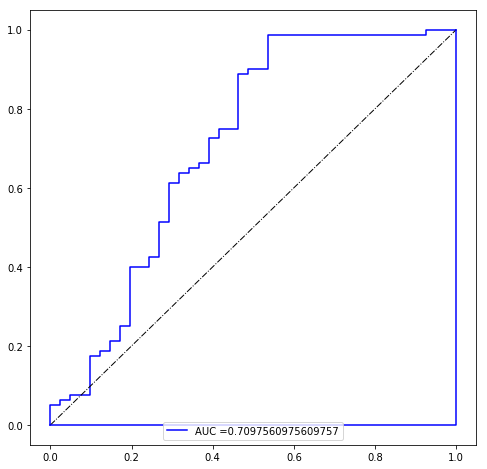

In [35]:
# Compute area under the curve (AUC)
auc_svm = metrics.roc_auc_score(Y_test, y_hat_svm_proba[:, 1])

# Compute False Positive Rate, True Positive Rate, and Thresholds using metrics library
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_hat_svm_proba[:, 1])

# Set the plotting area/ size
plt.figure(figsize = (8, 8))


# Plot the AUC curve
plt.plot(fpr, tpr, label='AUC =' + str(auc_svm), color='b')
plt.legend(loc=8)

# Plot the base line (diagonal dotted line)
plt.plot([0, 1], [0, 1], 'k-.', lw=1)

x = [0, 1, 1]
y = [0, 0, 1]
# Plot the base line (diagonal dotted line)
plt.plot(x, y, 'k-',  color='b')

### <a id='xgb_train_test'>4.5 XGBoost Classifier Model using Train-Test split</a>

In [38]:
# Generate a XGBoost object
xgb_model = XGBClassifier(learning_rate =0.01, 
                      subsample=0.75, 
                      colsample_bytree=0.72, 
                      min_child_weight=8,
                      max_depth=5)

# Train a XGBoost model with Train dataset
xgb_model.fit(X_train, Y_train)

# Predict the outcome
y_hat_xgb = xgb_model.predict(X_test)

# Compute the accuracy score and print it
accuracy_xgb = accuracy_score(Y_test, y_hat_xgb)

# Print first 8 rows to visualize the prediction.
print ("First few predicted Loan Status values:", y_hat_xgb[:8], "\n")

# Compute accuracy score
print ("Accuracy of XGBoost model:", accuracy_xgb)

# Print confusion matrix of actual and predicted values using Crosstab function
pd.crosstab(Y_test, y_hat_xgb, rownames=['Actual'], colnames=['Predicted'], margins=True)

First few predicted Loan Status values: [1 1 1 1 1 1 0 1] 

Accuracy of XGBoost model: 0.8016528925619835


Predicted,0,1,All
Actual,,,
0,18,23,41
1,1,79,80
All,19,102,121


#### 4.5.1 Print XGBoost Classifier Model parameters

In [39]:
# Print the XGBoost Model
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.72, gamma=0,
       learning_rate=0.01, max_delta_step=0, max_depth=5,
       min_child_weight=8, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.75, verbosity=1)

#### 4.5.2 To output the Binary Probability using XGBoost Classifier model ...

In [40]:
# Predict the binary probability outcome
y_hat_xgb_proba = xgb_model.predict_proba(X_test)

# Print first 8 rows to visualize the prediction.
y_hat_xgb_proba[:8]

array([[0.3646816 , 0.6353184 ],
       [0.32505584, 0.67494416],
       [0.31861126, 0.68138874],
       [0.2990147 , 0.7009853 ],
       [0.3179463 , 0.6820537 ],
       [0.30034322, 0.6996568 ],
       [0.6258414 , 0.37415862],
       [0.30840117, 0.69159883]], dtype=float32)

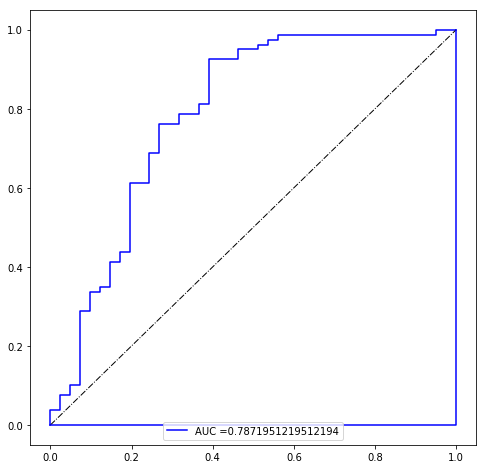

In [47]:
# Compute area under the curve (AUC)
auc_xgb = metrics.roc_auc_score(Y_test, y_hat_xgb_proba[:, 1])

# Compute False Positive Rate, True Positive Rate, and Thresholds using metrics library
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_hat_xgb_proba[:, 1])

# Set the plotting area/ size
plt.figure(figsize = (8, 8))

# Plot the AUC curve
plt.plot(fpr, tpr, label='AUC =' + str(auc_xgb), color='b')
plt.legend(loc=8)

# Plot the base line (diagonal dotted line)
plt.plot([0, 1], [0, 1], 'k-.', lw=1)

x = [0, 1, 1]
y = [0, 0, 1]
# Plot the base line (diagonal dotted line)
plt.plot(x, y, 'k-',  color='b')

#### 4.5.3 To draw Area Under the Curve (AUC) of XGBoost model ...

In [ ]:
<< HOME WORK: your code goes here >>

## <a id='analyze_results'>5. Analyze the model results</a>

###  <a id='print_AUC'>Print Accuracy and AUC of all models</a>

In [48]:
#auc_xgb = 0.7253211629479379  # Computed before hand
auc_knn = 0.5086206896551724  # Computed before hand

# Create a dataframe with Accuracy and AUC
acc_auc_df = pd.DataFrame(
                    {'Metrics': ['Accuracy', 'AUC'],
                    'Logistic Regression': [accuracy_lr, auc_lr],
                    'Random Forest': [accuracy_rf, auc_rf],
                    'k-NN': [accuracy_knn, auc_knn],
                    'SVM': [accuracy_svm, auc_svm],
                    'XGBoost': [accuracy_xgb, auc_xgb]}
)

acc_auc_df

,Metrics,Logistic Regression,Random Forest,k-NN,SVM,XGBoost
0,Accuracy,0.793388,0.818182,0.636364,0.801653,0.801653
1,AUC,0.734451,0.802287,0.508621,0.709756,0.787195


## Split the dataset. _Technique: K-Fold Cross Validation_

## <a id='binomial_kfold'>6. Generate Binary Classification Models using K-Fold split</a>

### <a id='lr_kfold'>6.1 Logistic Regression Model using K-Fold split</a>

In [49]:
# Set the number of splits
NO_SPLITS = 5

# Create KFold object with number of splits
kf = KFold(n_splits=NO_SPLITS, random_state=111)

# Create temp datasets to store the X and  part of the dataset
loan_data_X = loan_data.drop('Loan_Status',  axis = 1)
loan_data_Y = loan_data['Loan_Status']

# Generate a Logistic Regression object
lr_KFold_model = LogisticRegression(solver='liblinear')

# Define a variable to store the sum of accuracy of each fold
accuracy_score_sum = 0

# Split the data using KFold object, run the model iteratively, and compute accuracy
for train_index, test_index in kf.split(loan_data_X):

    # Split train and test datasets using fold index
    X_train, X_test = loan_data_X.iloc[train_index], loan_data_X.iloc[test_index]
    Y_train, Y_test = loan_data_Y[train_index], loan_data_Y[test_index]
    
    # Print the shape of the Train set
    print("Train dataset:", X_train.shape, Y_train.shape)

    # Print the shape of the Test set
    print("Test dataset:", X_test.shape, Y_test.shape)
    
    # Train a Logistic Regression model with Train dataset
    lr_KFold_model.fit(X_train, Y_train)

    # Compute the accuracy score and print it
    # It does two things. First, with 'X_test', it predicts the 'y-hat'. 
    # Second, with 'y-hat' and 'Y_test' it computes accuracy score
    accuracy_score = lr_KFold_model.score(X_test, Y_test)
    
    # Print accuracy score
    print("Accuracy:", accuracy_score, "\n")
    
    # Add accuracy of each iterations
    accuracy_score_sum += accuracy_score

# Compute the mean accuracy score of K-Folds and print it
mean_accuracy = accuracy_score_sum / NO_SPLITS
print ("Final accuracy using Logistic Regression:", mean_accuracy)

Train dataset: (480, 9) (480,)
Test dataset: (121, 9) (121,)
Accuracy: 0.8181818181818182 

Train dataset: (481, 9) (481,)
Test dataset: (120, 9) (120,)
Accuracy: 0.7583333333333333 

Train dataset: (481, 9) (481,)
Test dataset: (120, 9) (120,)
Accuracy: 0.8 

Train dataset: (481, 9) (481,)
Test dataset: (120, 9) (120,)
Accuracy: 0.8583333333333333 

Train dataset: (481, 9) (481,)
Test dataset: (120, 9) (120,)
Accuracy: 0.825 

Final accuracy using Logistic Regression: 0.8119696969696971


### <a id='rf_kfold'>6.2 Random Forest Model using K-Fold split</a>

In [50]:
# Generate a Random Forest object
rf_KFold_model = RandomForestClassifier(n_estimators=100, min_samples_leaf=1, random_state=2202)

# Define a variable to store the sum of accuracy of each fold
accuracy_score_sum = 0

# Create temp datasets to store the X and Y part of the dataset
loan_data_X = loan_data.drop('Loan_Status',  axis = 1)
loan_data_Y = loan_data['Loan_Status']

# Split the data using KFold object, run the model iteratively, and compute accuracy
for train_index, test_index in kf.split(loan_data_X):

    # Split train and test datasets using fold index
    X_train, X_test = loan_data_X.iloc[train_index], loan_data_X.iloc[test_index]
    Y_train, Y_test = loan_data_Y[train_index], loan_data_Y[test_index]

    # Print the shape of the Train set
    print("Train dataset:", X_train.shape, Y_train.shape)

    # Print the shape of the Test set
    print("Test dataset:", X_test.shape, Y_test.shape)
    
    # Train a Random Forest model with Train dataset
    rf_KFold_model.fit(X_train, Y_train)

    # Compute the accuracy score and print it
    accuracy_score = rf_KFold_model.score(X_test, Y_test)
    
    # Print accuracy score
    print("Accuracy:", accuracy_score, "\n")
    
    # Add accuracy of each iterations
    accuracy_score_sum += accuracy_score

# Compute the mean accuracy score of K-Folds and print it
mean_accuracy = accuracy_score_sum / NO_SPLITS
print ("Final accuracy using Random Forest model:", mean_accuracy)

Train dataset: (480, 9) (480,)
Test dataset: (121, 9) (121,)
Accuracy: 0.7933884297520661 

Train dataset: (481, 9) (481,)
Test dataset: (120, 9) (120,)
Accuracy: 0.7416666666666667 

Train dataset: (481, 9) (481,)
Test dataset: (120, 9) (120,)
Accuracy: 0.7916666666666666 

Train dataset: (481, 9) (481,)
Test dataset: (120, 9) (120,)
Accuracy: 0.8333333333333334 

Train dataset: (481, 9) (481,)
Test dataset: (120, 9) (120,)
Accuracy: 0.8083333333333333 

Final accuracy using Random Forest model: 0.7936776859504132


### <a id='knn_kfold'>6.3 k-Nearest Neighbor Model using K-Fold split</a>

In [ ]:
<< Your code goes here.. >>

### <a id='svm_kfold'>6.4 Support Vector Machine (SVM) Model using K-Fold split</a>

In [52]:
# Generate a Support Vector Machine (SVM) object
svm_KFold_model = svm.SVC(gamma='scale')

# Define a variable to store the sum of accuracy of each fold
accuracy_score_sum = 0

# Create temp datasets to store the X and Y part of the dataset
loan_data_X = loan_data.drop('Loan_Status',  axis = 1)
loan_data_Y = loan_data['Loan_Status']

# Split the data using KFold object, run the model iteratively, and compute accuracy
for train_index, test_index in kf.split(loan_data_X):

    # Split train and test datasets using fold index
    X_train, X_test = loan_data_X.iloc[train_index], loan_data_X.iloc[test_index]
    Y_train, Y_test = loan_data_Y[train_index], loan_data_Y[test_index]

    # Print the shape of the Train set
    print("Train dataset:", X_train.shape, Y_train.shape)

    # Print the shape of the Test set
    print("Test dataset:", X_test.shape, Y_test.shape)
    
    # Train a Random Forest model with Train dataset
    svm_KFold_model.fit(X_train, Y_train)

    # Compute the accuracy score and print it
    accuracy_score = svm_KFold_model.score(X_test, Y_test)
    
    # Print accuracy score
    print("Accuracy:", accuracy_score, "\n")
    
    # Add accuracy of each iterations
    accuracy_score_sum += accuracy_score

# Compute the mean accuracy score of K-Folds and print it
mean_accuracy = accuracy_score_sum / NO_SPLITS
print ("Final accuracy using Random Forest model:", mean_accuracy)

Train dataset: (480, 9) (480,)
Test dataset: (121, 9) (121,)
Accuracy: 0.6776859504132231 

Train dataset: (481, 9) (481,)
Test dataset: (120, 9) (120,)
Accuracy: 0.6833333333333333 

Train dataset: (481, 9) (481,)
Test dataset: (120, 9) (120,)
Accuracy: 0.7 

Train dataset: (481, 9) (481,)
Test dataset: (120, 9) (120,)
Accuracy: 0.7 

Train dataset: (481, 9) (481,)
Test dataset: (120, 9) (120,)
Accuracy: 0.6916666666666667 

Final accuracy using Random Forest model: 0.6905371900826445


### <a id='xgb_kfold'>6.5 XGBoost Classifier Model using K-Fold split</a>

In [ ]:
<< Your code goes here.. >>